In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms.bipartite.basic import density
import matplotlib.pyplot as plt
import matplotlib

# Read data from the preprocessed file
(data_analysis_and_preprocessing.ipynb needs to be executed first)

In [2]:
listenings = pd.read_csv('preprocessed_data/listenings.csv')

In [3]:
# we merge artist and track names to a single attribute since track name is not unique
listenings['art_tra_name'] =  listenings['artname'] + '@' +listenings['traname']

In [4]:
# to save memory
listenings.drop(['artname','traname'],axis=1,inplace=True)

In [5]:
listenings.head()

,userid,timestamp,album_id,album_date,art_tra_name
0,user_000001,2009-04-25 15:19:10+00:00,c8aec78d-e926-4135-9f12-f3d9d630091b,1993-03-31,坂本龍一@The Last Emperor (Theme)
1,user_000001,2009-04-25 13:21:17+00:00,c8aec78d-e926-4135-9f12-f3d9d630091b,1993-03-31,坂本龍一@The Last Emperor (Theme)
2,user_000001,2009-04-22 14:48:07+00:00,c8aec78d-e926-4135-9f12-f3d9d630091b,1993-03-31,坂本龍一@The Last Emperor (Theme)
3,user_000001,2009-04-21 17:35:33+00:00,c8aec78d-e926-4135-9f12-f3d9d630091b,1993-03-31,坂本龍一@The Last Emperor (Theme)
4,user_000001,2009-04-21 14:27:03+00:00,c8aec78d-e926-4135-9f12-f3d9d630091b,1993-03-31,坂本龍一@The Last Emperor (Theme)


# Create graph structure with each individual listening as an edge

In [6]:
G = nx.MultiGraph()
G.add_nodes_from(listenings['userid'], isSong=False)
G.add_nodes_from(listenings['art_tra_name'], isSong=True)
G.add_edges_from(list(zip(listenings['userid'],listenings['art_tra_name'])),time = listenings['timestamp'])

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 0,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 

## Degree distributions

We can see that most of the songs are unpopular and only a few are listened to often

<ipython-input-7-734c282dd98b>:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


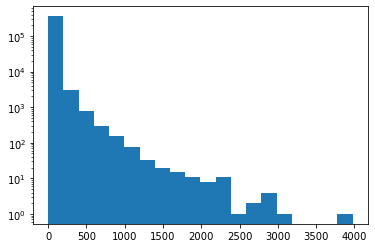

In [7]:
# log scaled degree distribution for songs 

songDegrees = [G.degree(n) for n,data in G.nodes(data=True) if data['isSong']==True]
plt.hist(songDegrees, bins=20)
plt.yscale('log', nonposy='clip')
plt.show()

The average degree:

In [8]:
sum(songDegrees) / len(songDegrees)

17.41132057903702

# Create graph structure with only distinct user-song edges

## Degree distributions

In [9]:
# now we look only at distinct song listenings ommiting the timestamp
listenings.drop('timestamp',axis=1, inplace=True)
listenings.drop_duplicates(inplace=True)

In [10]:
G = nx.Graph()
G.add_nodes_from(listenings['userid'], isSong=False)
G.add_nodes_from(listenings['art_tra_name'], isSong=True)
G.add_edges_from(list(zip(listenings['userid'],listenings['art_tra_name'])))

The pattern is a bit more regular but very similar when we only take distinct user-song edges.

<ipython-input-11-734c282dd98b>:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


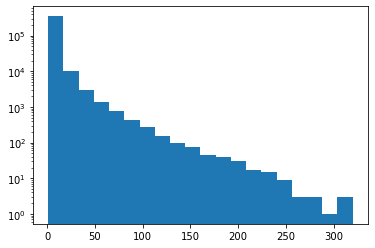

In [11]:
# log scaled degree distribution for songs 

songDegrees = [G.degree(n) for n,data in G.nodes(data=True) if data['isSong']==True]
plt.hist(songDegrees, bins=20)
plt.yscale('log', nonposy='clip')
plt.show()

The average degree:

In [12]:
sum(songDegrees) / len(songDegrees)

4.233594772673746

Similar pattern can be observed for users - most of the users listen only small number of different songs and only a few listen to many. The number of users drops faster than the number of songs with the increasing degree - it is not common that someone listens to dozens of thousands different songs.

<ipython-input-13-616e662be63c>:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


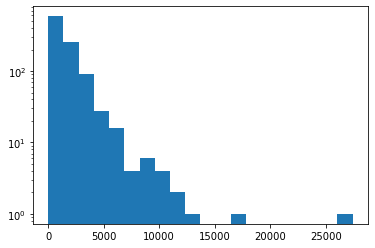

In [13]:
# log scaled degree distribution for users 

userDegrees = [G.degree(n) for n,data in G.nodes(data=True) if data['isSong']==False]
plt.hist(userDegrees, bins=20)
plt.yscale('log', nonposy='clip')
plt.show()

The average degree:

In [14]:
sum(userDegrees) / len(userDegrees)

1563.1253791708796

## Density

We calculate the density of this bipartite graph which is very low as expected. There are many different songs and a typical person only listens to small subset of the songs.

In [15]:
userNodes = [n for n,data in G.nodes(data=True) if data['isSong']==False]
density(G, userNodes)

0.004280682277728763

## Number of connected componenets

We can see the graph is only a single giant connected component since some people listen to relatively many different songs which connects the graph.

In [16]:
len(list(nx.connected_components(G)))

1

# Create graph structure with only distinct user-artist edges

## Degree distributions

In [17]:
listenings = pd.read_csv('preprocessed_data/listenings.csv')
listenings.drop(['timestamp','traname'],axis=1,inplace=True)
listenings.drop_duplicates(inplace=True)

In [18]:
G = nx.Graph()
G.add_nodes_from(listenings['userid'], isSong=False)
G.add_nodes_from(listenings['artname'], isSong=True)
G.add_edges_from(list(zip(listenings['userid'],listenings['artname'])))

Again the pattern is the same when we take a look at the distinct artist level (ingoring the songs) - most artists are known only to a small number of people.

<ipython-input-19-734c282dd98b>:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


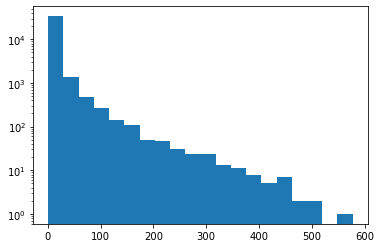

In [19]:
# log scaled degree distribution for songs 

songDegrees = [G.degree(n) for n,data in G.nodes(data=True) if data['isSong']==True]
plt.hist(songDegrees, bins=20)
plt.yscale('log', nonposy='clip')
plt.show()

The average degree:

In [20]:
sum(songDegrees) / len(songDegrees)

9.716096219931272

For the users degrees the histogram is a bit less regular but the general pattern is still the same.

<ipython-input-21-616e662be63c>:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


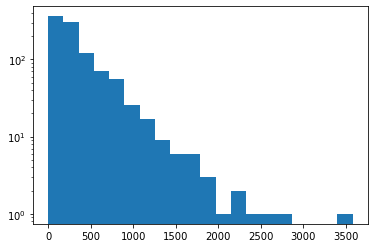

In [21]:
# log scaled degree distribution for users 

userDegrees = [G.degree(n) for n,data in G.nodes(data=True) if data['isSong']==False]
plt.hist(userDegrees, bins=20)
plt.yscale('log', nonposy='clip')
plt.show()

The average degree:

In [22]:
sum(userDegrees) / len(userDegrees)

357.35389282103137

## Density

For the graph with artists the density is a only bit higher compared to the songs. Again a person normally listets only to a small fraction of the artists that exist.

In [23]:
userNodes = [n for n,data in G.nodes(data=True) if data['isSong']==False]
density(G, userNodes)

0.009824162001952751